In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

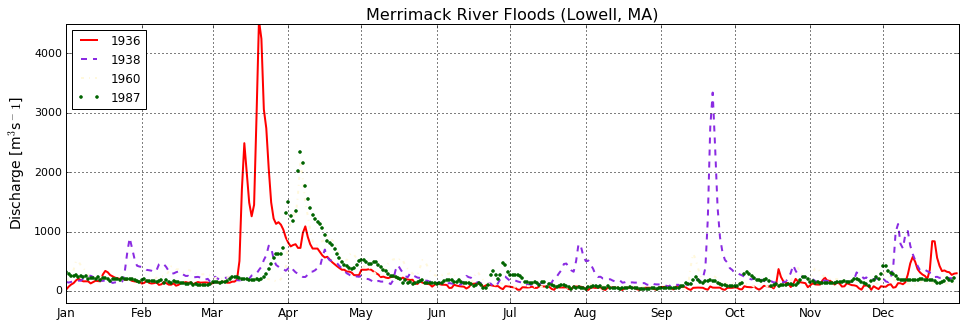

In [6]:
#1
a = open('../python4geosciences/data/merrimack_discharge.dat')
dat_1936 = []
dat_1938 = []
dat_1960 = []
dat_1987 = []
for line in a.readlines():
    if line[0] == '#':continue 
    dat = line.split()
    if dat[0] == 'USGS':
        b = dat[2].split('-')
        if b[0] == '1936':
            dat_1936.append(float(dat[3])/35.315)
        if b[0] == '1938':
            dat_1938.append(float(dat[3])/35.315)
        if b[0] == '1960':
            dat_1960.append(float(dat[3])/35.315)
        if b[0] == '1987':
            dat_1987.append(float(dat[3])/35.315)
a = plt.figure(figsize = (16, 5))
ax = a.add_subplot(111)
ax.plot(dat_1936, 'r', label = '1936', linewidth = 2)
ax.plot(dat_1938, '--', label = '1938', color = '#8A2BE2', linewidth = 2)
ax.plot(dat_1960, '-.', label = '1960', color = '#FFF8DC', linewidth = 2)
ax.plot(dat_1987, '.', label = '1987', color = '#006400', linewidth = 1.5)
ax.set_ylim(-200, 4500)
ax.set_xlim(0, 366)
plt.xticks([0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize = 12)
plt.yticks([0, 1000, 2000, 3000, 4000], fontsize = 11)
ax.set_ylabel("Discharge [m$^3$s$^-1$]", fontsize = 14)
ax.set_title("Merrimack River Floods (Lowell, MA)", fontsize = 16)
ax.legend(('1936', '1938', '1960', '1987'), loc = 2)
plt.grid(True, color = 'k', linestyle = ':', linewidth = 1)

C:\Users\Edmar\Anaconda3\lib\site-packages\matplotlib\contour.py:380: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


<a list of 97 text.Text objects>

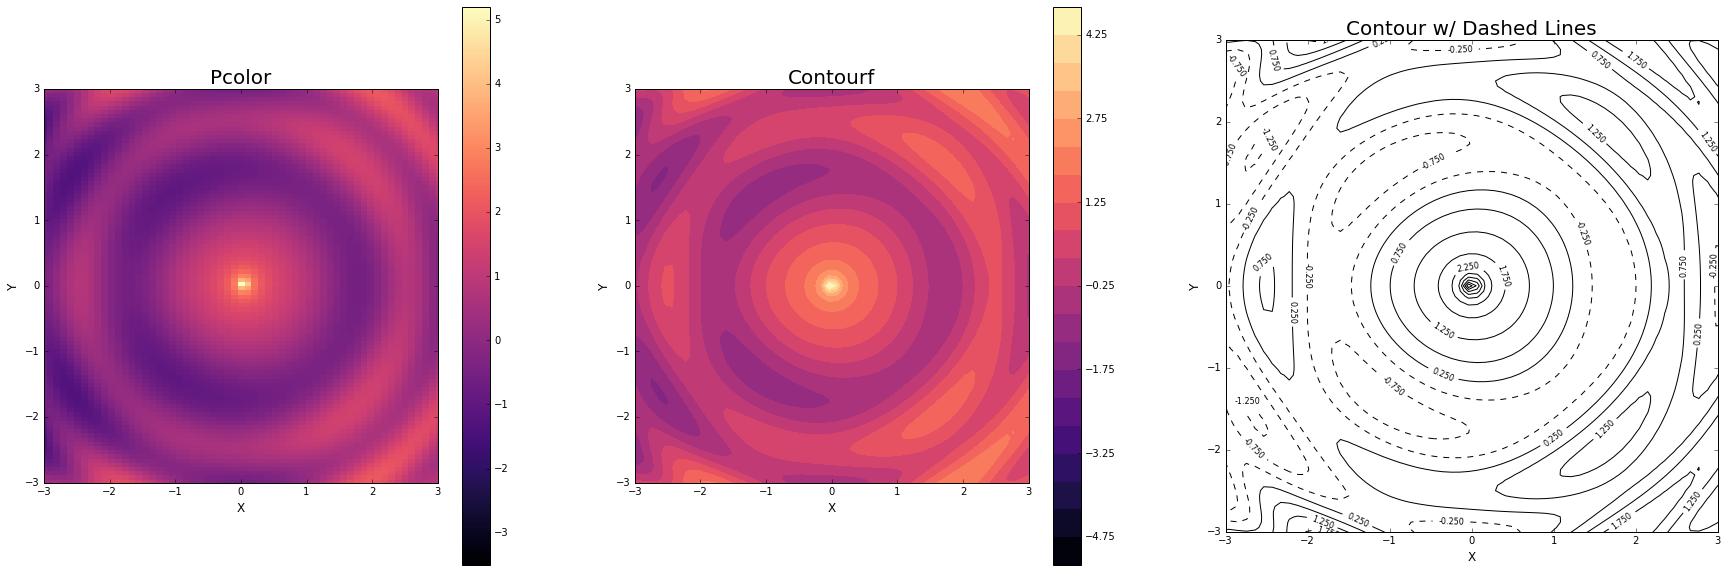

In [10]:
#2
c = np.arange(-5.25, 5.25, 0.5)
X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
   + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)
figs = plt.figure(figsize = (30, 10))

ax1 = figs.add_subplot(1, 3, 1, aspect = 'equal')
d = ax1.pcolormesh(X, Y, Z, linewidth = 3, cmap = 'magma', vmin = -3.5)
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.set_xlabel('X', fontsize = 12)
ax1.set_ylabel('Y', fontsize = 12)
ax1.set_title('Pcolor', fontsize = 20)
figs.colorbar(d)

ax2 = figs.add_subplot(1, 3, 2, aspect = 'equal')
d = ax2.contourf(X, Y, Z, cmap = 'magma', levels = c)
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.set_xlabel('X', fontsize = 12)
ax2.set_ylabel('Y', fontsize = 12)
ax2.set_title('Contourf', fontsize = 20)
figs.colorbar(d)

ax3 = figs.add_subplot(1, 3, 3, aspect = 'equal')
ax3.set_xlim(-3, 3)
ax3.set_ylim(-3, 3)
ax3.set_xlabel('X', fontsize = 12)
ax3.set_ylabel('Y', fontsize = 12)
ax3.set_title('Contour w/ Dashed Lines', fontsize = 20)
plt.rcParams['contour.negative_linestyle'] = 'dashed'
e = ax3.contour(X, Y, Z, colors = 'black', levels = c)
plt.clabel(e, fontsize = 8, inline = 1)

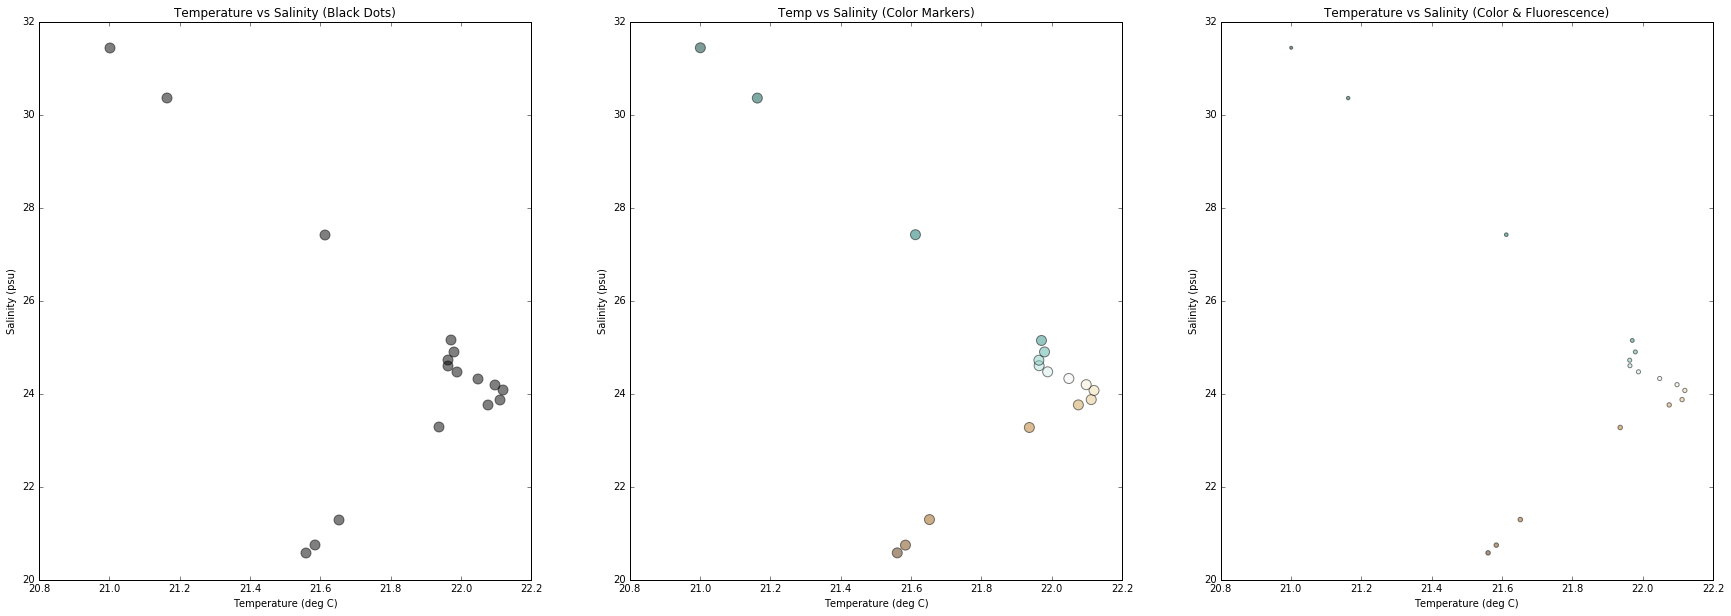

In [14]:
#3
f = np.genfromtxt('../python4geosciences/data/MCH/m1001a.cnv2', skip_header=57)

g = plt.figure(figsize=(30, 10))
D = f[:, 1]
T = f[:, 2]
S = f[:, 5]
F = f[:, 14]

ax4 = g.add_subplot(1, 3, 1)
ax4.set_xlabel('Temperature (deg C)')
ax4.set_ylabel('Salinity (psu)')
ax4.set_title('Temperature vs Salinity (Black Dots)')
fig1 = ax4.scatter(T, S, s = 100, c = 'k', alpha = 0.5)
 
ax5 = g.add_subplot(1, 3, 2)
ax5.set_xlabel('Temperature (deg C)')
ax5.set_ylabel('Salinity (psu)')
ax5.set_title('Temp vs Salinity (Color Markers)')
fig2 = ax5.scatter(T, S, s=100, c = D, cmap= 'BrBG', alpha = 0.5 )

ax6 = g.add_subplot(1, 3, 3)
ax6.set_xlabel('Temperature (deg C)')
ax6.set_ylabel('Salinity (psu)')
ax6.set_title('Temperature vs Salinity (Color & Fluorescence)')
fig3 = ax6.scatter(T, S, s = (F)**3, c = D, cmap = 'BrBG', alpha = 0.5)

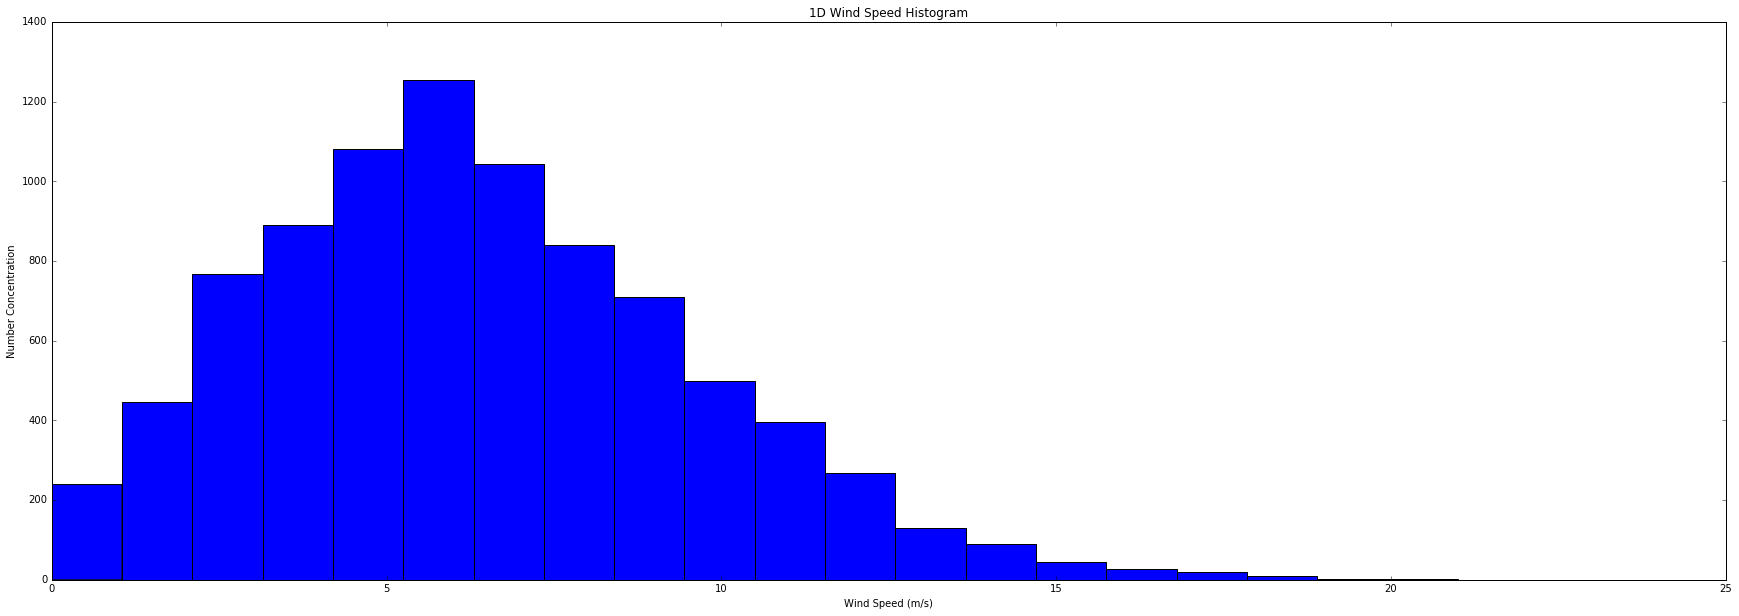

In [13]:
#4
burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
wind_speed = burl[:, 6]

figure = plt.figure(figsize=(30, 10))
axis = figure.add_subplot(1, 1, 1)
axis.hist(wind_speed, bins = 20)
axis.set_xlabel('Wind Speed (m/s)')
axis.set_ylabel('Number Concentration')
axis.set_title('1D Wind Speed Histogram')